# Imports and initial basic data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import ast

In [2]:
from absorbance import *

In [3]:
raw_data_directory = 'raw_data'
processed_dark_data_directory = 'processed_data'
processed_absorbance_data_directory = 'processed_data'

start_index = 50
end_index = 998

integration_time_us = 10000

thickness_um = 93

params_for_dark_data = { 'start_index' : start_index,
                         'end_index' : end_index,
                         'integration_time_us' : integration_time_us
                       }

In [4]:
params_for_dark_data

{'end_index': 998, 'integration_time_us': 10000, 'start_index': 50}

In [5]:
params_for_dark_data['start_index']

50

# Process Dark Data

In [6]:
list_of_dark_data = get_list_of_dark_data(raw_data_directory)
list_of_dark_data

['dark_2015-06-27']

In [7]:
# Process dark data and save to file
dark_data_file_name = process_and_save_dark_data(raw_data_directory, list_of_dark_data[0], 
                                                 processed_dark_data_directory, params_for_dark_data)
print(dark_data_file_name)

processed_data/dark_2015-06-27.csv


In [8]:
# Read dark data from file
comment, dark_data = get_processed_data_from_file(dark_data_file_name)

# See what we got
print(comment)
print(dark_data.shape)
print(min(dark_data[:,1]))
print(max(dark_data[:,1]))

{'integration_time_us': 10000, 'end_index': 998, 'start_index': 50}
(948, 3)
2395.02
2396.97


In [9]:
dark_data_params = ast.literal_eval(comment)
dark_data_params

{'end_index': 998, 'integration_time_us': 10000, 'start_index': 50}

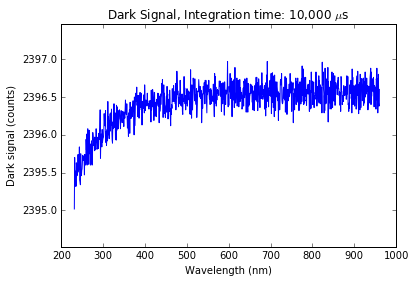

In [10]:
fig, ax = plt.subplots()
ax.plot(dark_data[:, 0], dark_data[:, 1])
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Dark signal (counts)')
ax.set_ylim(min(dark_data[:,1])-0.5, max(dark_data[:,1])+0.5)
ax.get_yaxis().get_major_formatter().set_useOffset(False)
ax.set_title('Dark Signal, Integration time: 10,000 $\mu$s')

The dark values are somewhat high, but there is very little change in the data as a function of wavelength--only 2 counts out of ~2400.

# Process Raw Spectrum Data Files

In [12]:
params_for_dark_data['dark_data_file'] = dark_data_file_name

In [13]:
list_of_materials = get_list_of_materials(raw_data_directory)
list_of_materials

['fslclear_2015-07-30',
 'irgacure819_2015-06-30',
 'martius_05_2015-06-30',
 'plasclear_2015-06-27',
 'pr48_2015-07-27',
 'pr48noA_2015-07-30',
 'pr48noPA_2015-07-30',
 'sudanI_015_2015-06-27',
 'sudanI_01_2015-06-27',
 'sudanI_02_2015-06-27',
 'sudanI_04_2015-06-27']

In [13]:
material_index = 10
datadirectory = makename(raw_data_directory,list_of_materials[material_index])
data = process_data_to_get_absorbance(datadirectory, dark_data, 
                                      dark_data_params['start_index'], 
                                      dark_data_params['end_index'])
data

array([[  2.31083716e+02,   6.43500018e-02],
       [  2.31887754e+02,   6.92254030e-02],
       [  2.32691721e+02,   6.63456143e-02],
       ..., 
       [  9.58400983e+02,   8.82407677e-03],
       [  9.59135495e+02,   7.62628110e-03],
       [  9.59869931e+02,   1.00558367e-02]])

In [14]:
temp_name = makename(processed_absorbance_data_directory, list_of_materials[material_index]+'.csv')
np.savetxt(temp_name, data, delimiter=',', header=str(params_for_dark_data))

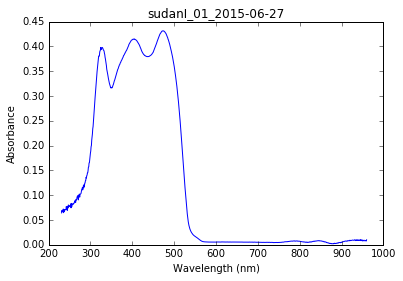

In [15]:
fig, ax = plt.subplots()
ax.plot(data[:,0], data[:,1])
#ax.set_ylim(-0.003,0.003)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absorbance')
ax.set_title(list_of_materials[material_index])

1. Get dark data
1. Add dark data filename to dict
1. Get list of raw data directories
1. Loop over raw data directories:
    1. Get and process data
    1. Make filename with correct path
    1. Write dict and data to file

### Get dark data

In [14]:
list_of_dark_data = get_list_of_processed_dark_data_files(processed_dark_data_directory)
list_of_dark_data

['dark_2015-06-27.csv']

In [15]:
dark_data_filename = list_of_dark_data[0]
dark_data_path_and_name = makename(processed_dark_data_directory, dark_data_filename)
print(dark_data_filename, dark_data_path_and_name)

dark_2015-06-27.csv processed_data/dark_2015-06-27.csv


In [22]:
dark_info, dark_data = get_processed_data_from_file(dark_data_path_and_name)

### Add dark file name to dict containing relevant parameters

In [23]:
info = ast.literal_eval(dark_info)
info['dark_data_file'] = dark_data_filename
info

{'dark_data_file': 'dark_2015-06-27.csv',
 'end_index': 998,
 'integration_time_us': 10000,
 'start_index': 50}

### Get list of resins

In [17]:
list_of_materials = get_list_of_materials(raw_data_directory)
list_of_materials

['fslclear_2015-07-30',
 'irgacure819_2015-06-30',
 'martius_05_2015-06-30',
 'plasclear_2015-06-27',
 'pr48_2015-07-27',
 'pr48noA_2015-07-30',
 'pr48noPA_2015-07-30',
 'sudanI_015_2015-06-27',
 'sudanI_01_2015-06-27',
 'sudanI_02_2015-06-27',
 'sudanI_04_2015-06-27']

### Read raw data, process, and save for each material

In [33]:
for m in list_of_materials:
    datadirectory = makename(raw_data_directory, m)
    print(datadirectory)
    data = process_data_to_get_absorbance(datadirectory, dark_data, 
                                          info['start_index'], 
                                          info['end_index'])
    temp_name = makename(processed_absorbance_data_directory, m+'.csv')
    np.savetxt(temp_name, data, delimiter=',', header=str(info))

raw_data/fslclear_2015-07-30
raw_data/irgacure819_2015-06-30
raw_data/martius_05_2015-06-30
raw_data/plasclear_2015-06-27
raw_data/pr48_2015-07-27
raw_data/pr48noA_2015-07-30
raw_data/pr48noPA_2015-07-30
raw_data/sudanI_015_2015-06-27
raw_data/sudanI_01_2015-06-27
raw_data/sudanI_02_2015-06-27
raw_data/sudanI_04_2015-06-27


### Get filenames for processed data

In [30]:
temp = get_list_of_materials(processed_absorbance_data_directory)
temp

['fslclear_2015-07-30.csv',
 'irgacure819_2015-06-30.csv',
 'martius_05_2015-06-30.csv',
 'plasclear_2015-06-27.csv',
 'pr48_2015-07-27.csv',
 'pr48noA_2015-07-30.csv',
 'pr48noPA_2015-07-30.csv',
 'sudanI_015_2015-06-27.csv',
 'sudanI_01_2015-06-27.csv',
 'sudanI_02_2015-06-27.csv',
 'sudanI_04_2015-06-27.csv']

In [31]:
temp[0].rsplit('_', 1)

['fslclear', '2015-07-30.csv']

In [32]:
temp[0].rsplit('_', 1)[0]

'fslclear'

In [33]:
temp[0].rpartition('_',)

('fslclear', '_', '2015-07-30.csv')

In [29]:
resins = {}
for fn in temp:
    tempname = makename(processed_absorbance_data_directory, fn)
    r_info, r_data = get_processed_data_from_file(tempname)
    key = fn.rsplit('_', 1)[0]
    print(key, tempname)
    resins[key] = r_data
    

fslclear processed_data/fslclear_2015-07-30.csv
irgacure819 processed_data/irgacure819_2015-06-30.csv
martius_05 processed_data/martius_05_2015-06-30.csv
plasclear processed_data/plasclear_2015-06-27.csv
pr48 processed_data/pr48_2015-07-27.csv
pr48noA processed_data/pr48noA_2015-07-30.csv
pr48noPA processed_data/pr48noPA_2015-07-30.csv
sudanI_015 processed_data/sudanI_015_2015-06-27.csv
sudanI_01 processed_data/sudanI_01_2015-06-27.csv
sudanI_02 processed_data/sudanI_02_2015-06-27.csv
sudanI_04 processed_data/sudanI_04_2015-06-27.csv


In [27]:
resins.keys()

dict_keys(['plasclear', 'irgacure819', 'martius_05', 'fslclear', 'pr48', 'sudanI_015', 'sudanI_01', 'sudanI_02', 'pr48noA', 'sudanI_04', 'pr48noPA'])

In [36]:
for key in sorted(resins.keys()):
    print(key)

fslclear
irgacure819
martius_05
plasclear
pr48
pr48noA
pr48noPA
sudanI_01
sudanI_015
sudanI_02
sudanI_04


In [38]:
list(sorted(resins.keys()))

['fslclear',
 'irgacure819',
 'martius_05',
 'plasclear',
 'pr48',
 'pr48noA',
 'pr48noPA',
 'sudanI_01',
 'sudanI_015',
 'sudanI_02',
 'sudanI_04']

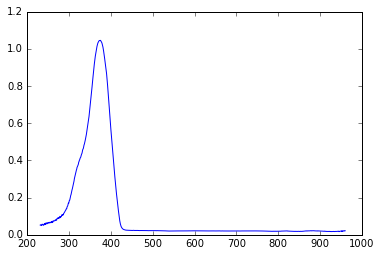

In [28]:
fig, ax = plt.subplots()
ax.plot(resins['plasclear'][:,0], resins['plasclear'][:,1])

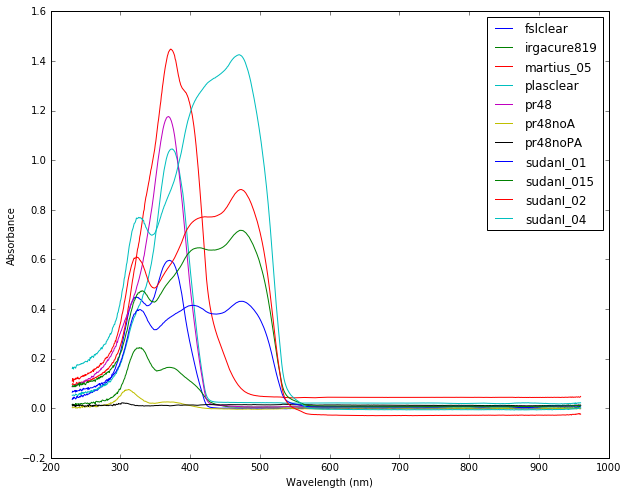

In [41]:
keys = list(sorted(resins.keys()))
fig, ax = plt.subplots(figsize=(10,8))
for key in sorted(resins.keys()):
    ax.plot(resins[key][:,0], resins[key][:,1], label=key)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absorbance')
ax.legend()